# Installations and Imports

In [42]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Importing required libraries

import pandas as pd
import missingno as msno
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
import time

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



warnings.filterwarnings("ignore")

# Feature Exploration

In [46]:
# Viewing training dataset

train_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_training_data.csv')
train_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,12/6/08,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,12/7/08,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,12/8/08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,12/9/08,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,12/10/08,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [47]:
# Analyzing feature categories

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49424 entries, 0 to 49423
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           49424 non-null  object 
 1   Location       49424 non-null  object 
 2   MinTemp        49077 non-null  float64
 3   MaxTemp        49260 non-null  float64
 4   Rainfall       48809 non-null  float64
 5   Evaporation    22507 non-null  float64
 6   Sunshine       17707 non-null  float64
 7   WindGustDir    44878 non-null  object 
 8   WindGustSpeed  44885 non-null  float64
 9   WindDir9am     44383 non-null  object 
 10  WindDir3pm     47534 non-null  object 
 11  WindSpeed9am   48438 non-null  float64
 12  WindSpeed3pm   48167 non-null  float64
 13  Humidity9am    48702 non-null  float64
 14  Humidity3pm    48505 non-null  float64
 15  Pressure9am    41809 non-null  float64
 16  Pressure3pm    41858 non-null  float64
 17  Cloud9am       29478 non-null  float64
 18  Cloud3

## Findings:

### From the above, there is a mixture of categorical and numerical features. 

### Categorical features have the datatype as object and numerical features have the datatype as float64. 

### We see some of the features have missing values in the dataset.

In [48]:
# Viewing statistical properties of all features 

train_data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,49424,49424,49077.000000,49260.000000,48809.000000,22507.000000,17707.000000,44878,44885.000000,44383,...,48505.000000,41809.000000,41858.000000,29478.000000,29033.000000,48881.000000,48652.000000,48809,49424.000000,49424
unique,2735,22,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,5/17/09,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,22,2718,NaN,NaN,NaN,NaN,NaN,3741,NaN,3650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37977,NaN,38420
mean,NaN,NaN,11.470699,22.403618,2.452183,5.271360,7.424233,NaN,39.854138,NaN,...,52.857664,1018.383312,1015.960340,4.531481,4.613819,16.065711,20.957741,NaN,2.469143,NaN
std,NaN,NaN,6.381146,6.919740,8.532466,4.093008,3.836154,NaN,14.232263,NaN,...,20.753841,7.039554,6.941918,2.909149,2.699023,6.129276,6.740999,NaN,8.558594,NaN
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,1.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,NaN,0.000000,NaN
25%,NaN,NaN,6.900000,17.800000,0.000000,2.600000,4.600000,NaN,30.000000,NaN,...,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,11.800000,22.100000,0.000000,4.400000,8.300000,NaN,39.000000,NaN,...,53.000000,1018.500000,1016.000000,5.000000,5.000000,16.500000,20.600000,NaN,0.000000,NaN
75%,NaN,NaN,16.600000,26.700000,0.600000,7.000000,10.400000,NaN,48.000000,NaN,...,67.000000,1023.200000,1020.700000,7.000000,7.000000,20.600000,25.100000,NaN,0.600000,NaN


No     0.777355
Yes    0.222645
Name: RainTomorrow, dtype: float64

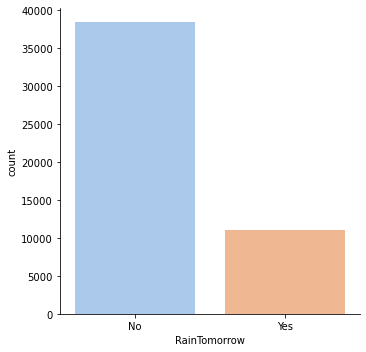

In [49]:
# Exploring and Visualizing the frequency distribution of the target variable 'RainTomorrow'

sns.catplot(x="RainTomorrow", kind="count", palette="pastel", data=train_data)
train_data['RainTomorrow'].value_counts()/len(train_data)

## Findings

### The above exploration confirms that 'No' class label occurs 77% and the 'Yes' occurs 22%.

### This indicates we are dealing with an unbalanced dataset. 

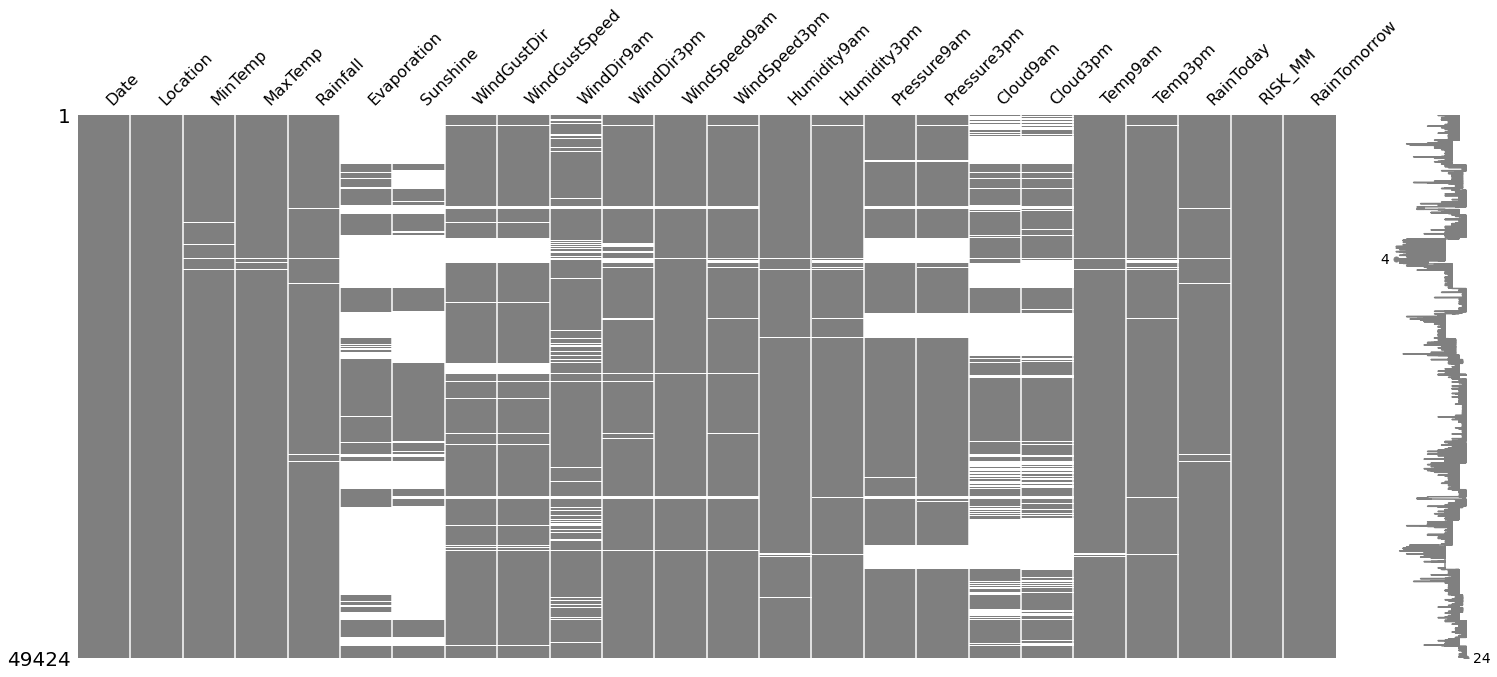

In [50]:
# Checking the missing data in the training dataset

msno.matrix(train_data,color=(0.50,0.50,0.50))

In [51]:
# Exploring missing values

total_values = train_data.isnull().sum().sort_values(ascending=False)
percentage = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total_values, percentage], axis=1, keys=['Total_Count', 'Percent_Value'])
missing_value.head(10)

,Total_Count,Percent_Value
Sunshine,31717,0.641733
Evaporation,26917,0.544614
Cloud3pm,20391,0.412573
Cloud9am,19946,0.403569
Pressure9am,7615,0.154075
Pressure3pm,7566,0.153084
WindDir9am,5041,0.101995
WindGustDir,4546,0.091980
WindGustSpeed,4539,0.091838
WindDir3pm,1890,0.038241


# Feature Engineering

In [52]:
# "RainToday" and "RainTomorrow" features will be converted into binary (1/0)
# 1 represents "Yes"
# 0 represents "No"

train_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
train_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)

In [53]:
# Check if the text to numeric class label conversion is successful

train_data['RainTomorrow'].value_counts()/len(train_data)

0    0.777355
1    0.222645
Name: RainTomorrow, dtype: float64

In [54]:
# The next step is to compute categorical columns with mode, and transform them into numerical values.

train_data.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [55]:
# Compute categorical var with Mode

train_data['Date'] = train_data['Date'].fillna(train_data['Date'].mode()[0])
train_data['Location'] = train_data['Location'].fillna(train_data['Location'].mode()[0])
train_data['WindGustDir'] = train_data['WindGustDir'].fillna(train_data['WindGustDir'].mode()[0])
train_data['WindDir9am'] = train_data['WindDir9am'].fillna(train_data['WindDir9am'].mode()[0])
train_data['WindDir3pm'] = train_data['WindDir3pm'].fillna(train_data['WindDir3pm'].mode()[0])

In [56]:
# Convert categorical features to continuous features with Label Encoding

labelencoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    train_data[column] = labelencoders[column].fit_transform(train_data[column])

In [57]:
# We will impute the missing values using mean statistical value. 

train_data.fillna(train_data.mean(), inplace=True)

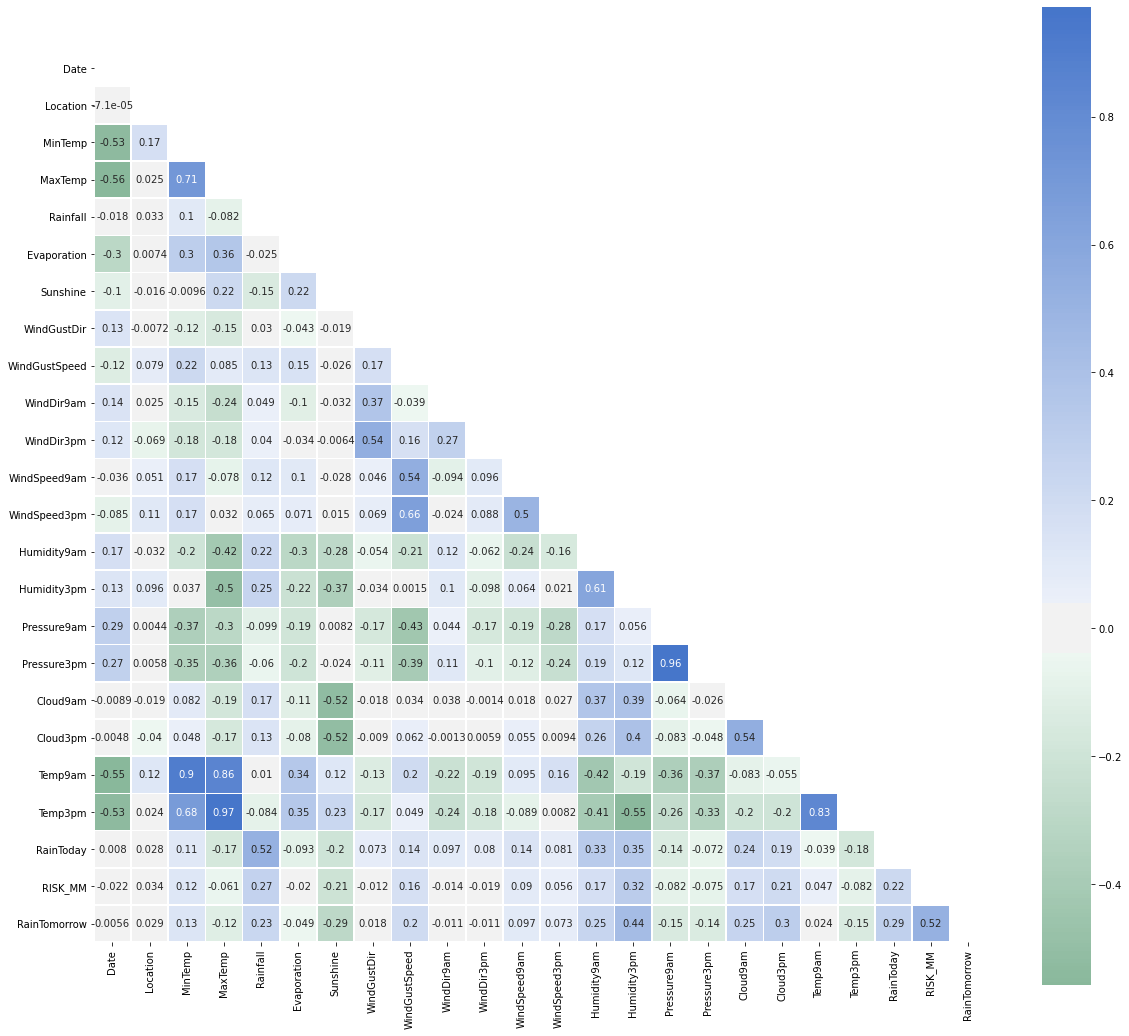

In [58]:
# Next step is to check if any feature is correlated highly with any other feature

# Correlation Heatmap

correlation = train_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(140, 255, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


## Findings

### Some of the pairs that have correlation are: Pressure9am and  Presssure3pm, Temp9am and Temp3pm, etc.

### Since none of the variables have same correlation, we are not discarding any features as every feature might add value to the training.

# Feature Selection

In [59]:
# Feature Selection by Filter Method(Chi-Square Value)

# Standardize the data using MinMaxScaler instead of StandardScaler to avoid negative values

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train_data)

train_data = pd.DataFrame(r_scaler.transform(train_data), index=train_data.index, columns=train_data.columns)

In [60]:
# Feature Importance using Filter Method (Chi-Square)

X = train_data.loc[:,train_data.columns!='RainTomorrow']
y = train_data[['RainTomorrow']]

selector = SelectKBest(chi2, k=11)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


# Model Training

In [61]:
# Ignore the 'RISK_MM' feature as it leaks the important information to the models

features = train_data[['MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
           'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday']]
target = train_data['RainTomorrow']

# Split into test and train

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 42) 
#X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 


# Normalize Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [62]:
def plot_roc_curve(fpos, tpos):  
    plt.plot(fpos, tpos, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [63]:
def run_stats_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fpos, tpos, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fpos, tpos)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8326319197151182
ROC Area under Curve = 0.6923544183139658
Time taken = 0.1302928924560547
              precision    recall  f1-score   support

         0.0    0.85228   0.94815   0.89766      9566
         1.0    0.71062   0.43656   0.54085      2790

    accuracy                        0.83263     12356
   macro avg    0.78145   0.69235   0.71926     12356
weighted avg    0.82030   0.83263   0.81710     12356



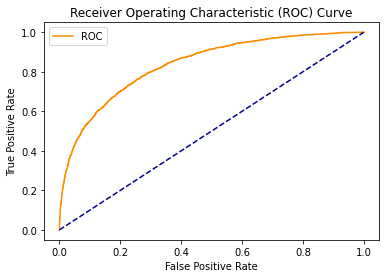

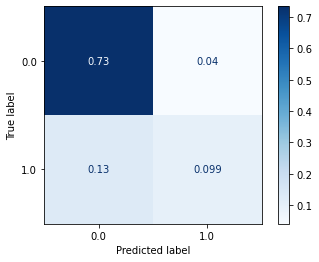

In [64]:
# Model 1 - Logistic Regression 
params_lr = {'penalty': 'l2','solver':'liblinear','multi_class':'ovr'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_stats_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8221107154418906
ROC Area under Curve = 0.6521735057780056
Time taken = 0.03134608268737793
              precision    recall  f1-score   support

         0.0    0.83376   0.96205   0.89332      9566
         1.0    0.72458   0.34229   0.46495      2790

    accuracy                        0.82211     12356
   macro avg    0.77917   0.65217   0.67913     12356
weighted avg    0.80910   0.82211   0.79659     12356



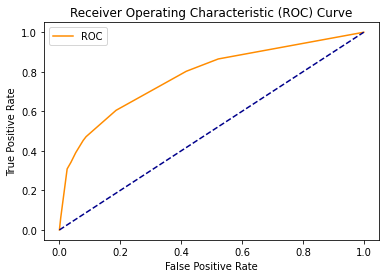

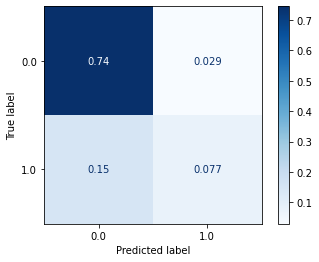

In [65]:
# Model 2 - Decision Tree

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 32,
             'max_features': "log2",
             'max_leaf_nodes':10}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_stats_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8022822920038848
ROC Area under Curve = 0.7085516805711987
Time taken = 0.02499675750732422
              precision    recall  f1-score   support

         0.0    0.86705   0.87947   0.87322      9566
         1.0    0.56540   0.53763   0.55117      2790

    accuracy                        0.80228     12356
   macro avg    0.71622   0.70855   0.71219     12356
weighted avg    0.79894   0.80228   0.80050     12356



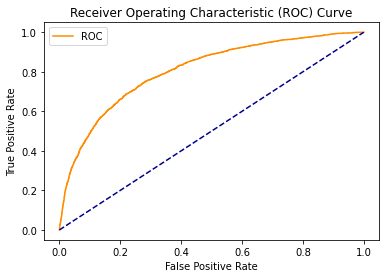

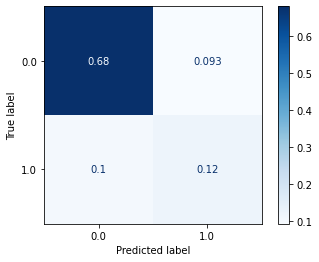

In [66]:
#Model 3 - Gaussian Naive Bayes

params_gnb = {'var_smoothing':1e-9}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = run_stats_model(model_gnb, X_train, y_train, X_test, y_test)


In [67]:
# Model 3 - Gaussian Naive Bayes without parameters

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
prediction_y = gaussian.predict(X_test)
prediction_y =gaussian.predict(X_test)
X=accuracy_score(y_test, prediction_y)
print('test accuracy: %.5f' % X)

test accuracy: 0.80228


Accuracy = 0.8319844609906119
ROC Area under Curve = 0.7056461167351215
Time taken = 33.041815996170044
              precision    recall  f1-score   support

         0.0    0.85947   0.93602   0.89612      9566
         1.0    0.68421   0.47527   0.56091      2790

    accuracy                        0.83198     12356
   macro avg    0.77184   0.70565   0.72852     12356
weighted avg    0.81990   0.83198   0.82043     12356



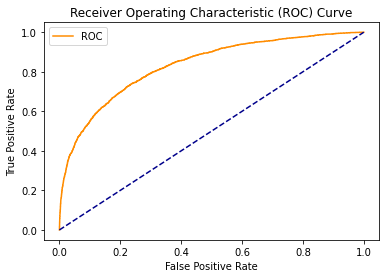

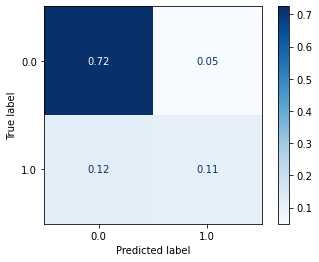

In [68]:
# Model 4 - Neural Network (Multilayer Perceptron)

from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (25,25,25),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 500,
             'batch_size' : 10}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_stats_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.8298802201359663
ROC Area under Curve = 0.688546202687685
Time taken = 0.5094490051269531
              precision    recall  f1-score   support

         0.0    0.85075   0.94627   0.89597      9566
         1.0    0.70047   0.43082   0.53351      2790

    accuracy                        0.82988     12356
   macro avg    0.77561   0.68855   0.71474     12356
weighted avg    0.81682   0.82988   0.81413     12356



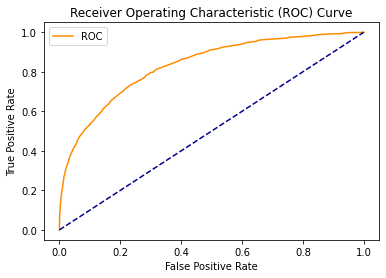

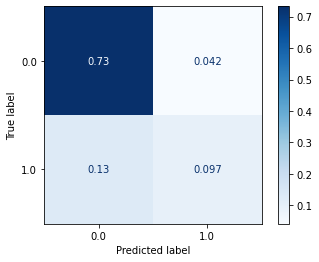

In [69]:
# Model 5 - AdaBoostClassifier

params_abc = {'n_estimators' : 20,
               'random_state' : 10
             }

model_abc = AdaBoostClassifier(**params_abc)
model_abc, accuracy_abc, roc_auc_abc, tt_abc = run_stats_model(model_abc, X_train, y_train, X_test, y_test)

In [70]:
# Applying 5 - fold cross validation for the decision tree model

# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_nn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.83733477 0.84205557 0.84151605 0.83704303 0.83758263]


In [71]:
# Find the Average Cross - Validation Score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8391


In [72]:
# From the above, CV does not improve the accuracy of the model. 

# Now, let us try same experiment by oversampling the imbalanced dataset and removing the outliers in the dataset and check if the accuracy of the models increases

## Feature Engineering

In [73]:
# Viewing training dataset

train_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_training_data.csv')
train_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [74]:
# "RainToday" and "RainTomorrow" features will be converted into binary (1/0)
# 1 represents "Yes"
# 0 represents "No"

train_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
train_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)

In [75]:
# Check if the text to numeric class label conversion is successful

train_data['RainTomorrow'].value_counts()/len(train_data)

0    0.777355
1    0.222645
Name: RainTomorrow, dtype: float64

In [76]:
# Balancing the class imbalance in 'RainTomorrow' feature by doing oversampling 

no_response = train_data[train_data.RainTomorrow == 0]
yes_Response = train_data[train_data.RainTomorrow == 1]
yes_oversampled = resample(yes_Response, replace=True, n_samples=len(no_response), random_state=123)
oversampled_dataset = pd.concat([no_response, yes_oversampled])

oversampled_dataset['RainTomorrow'].value_counts()/len(train_data)

1    0.777355
0    0.777355
Name: RainTomorrow, dtype: float64

In [77]:
# Checking the details of missing values
total_values = oversampled_dataset.isnull().sum().sort_values(ascending=False)
percentage = (oversampled_dataset.isnull().sum()/oversampled_dataset.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total_values, percentage], axis=1, keys=['Total_Count', 'Percent_Value'])
missing_value.head(10)

,Total_Count,Percent_Value
Sunshine,48998,0.637663
Evaporation,42366,0.551353
Cloud3pm,29700,0.386517
Cloud9am,29538,0.384409
Pressure9am,12178,0.158485
Pressure3pm,12113,0.157639
WindDir9am,7550,0.098256
WindGustDir,7300,0.095003
WindGustSpeed,7286,0.094820
WindDir3pm,3170,0.041255


In [78]:
# The next step is to compute categorical columns with mode, and transform them into numerical values. Then, we will
# impute the missing values using MICE Package

In [79]:
oversampled_dataset.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [80]:
# Compute categorical var with Mode
oversampled_dataset['Date'] = oversampled_dataset['Date'].fillna(oversampled_dataset['Date'].mode()[0])
oversampled_dataset['Location'] = oversampled_dataset['Location'].fillna(oversampled_dataset['Location'].mode()[0])
oversampled_dataset['WindGustDir'] = oversampled_dataset['WindGustDir'].fillna(oversampled_dataset['WindGustDir'].mode()[0])
oversampled_dataset['WindDir9am'] = oversampled_dataset['WindDir9am'].fillna(oversampled_dataset['WindDir9am'].mode()[0])
oversampled_dataset['WindDir3pm'] = oversampled_dataset['WindDir3pm'].fillna(oversampled_dataset['WindDir3pm'].mode()[0])

In [81]:
# Convert categorical features to continuous features with Label Encoding
labelencoders = {}
for column in oversampled_dataset.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    oversampled_dataset[column] = labelencoders[column].fit_transform(oversampled_dataset[column])

In [82]:
# Multiple Imputation by Chained Equations
MiceImputedValue = oversampled_dataset.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputedValue.iloc[:, :] = mice_imputer.fit_transform(oversampled_dataset)

In [83]:
#Viewing the Mice Imputations
MiceImputedValue.head()
MiceImputedValue['RainTomorrow'].value_counts()/len(train_data)

1.0    0.777355
0.0    0.777355
Name: RainTomorrow, dtype: float64

In [84]:
# Next step is to check of the NAN Values are imputed completely or not
MiceImputedValue.isna()
# The NAN values are removed completely

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
# InterQuartileRange is used to detect the outliers from the MiceImputed data
Q1 = MiceImputedValue.quantile(0.25)
Q3 = MiceImputedValue.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1338.000000
Location           11.000000
MinTemp             9.600000
MaxTemp             8.800000
Rainfall            2.400000
Evaporation         3.843849
Sunshine            6.286577
WindGustDir         7.000000
WindGustSpeed      19.000000
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       13.000000
WindSpeed3pm       13.000000
Humidity9am        25.510397
Humidity3pm        33.000000
Pressure9am         7.857209
Pressure3pm         7.900000
Cloud9am            4.000000
Cloud3pm            3.621614
Temp9am             8.800000
Temp3pm             8.400000
RainToday           1.000000
RISK_MM             5.400000
RainTomorrow        1.000000
dtype: float64


In [86]:
# Removing outliers from dataset
MiceImputedValue = MiceImputedValue[~((MiceImputedValue < (Q1 - 1.5 * IQR)) |(MiceImputedValue > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputedValue.shape

(53691, 24)

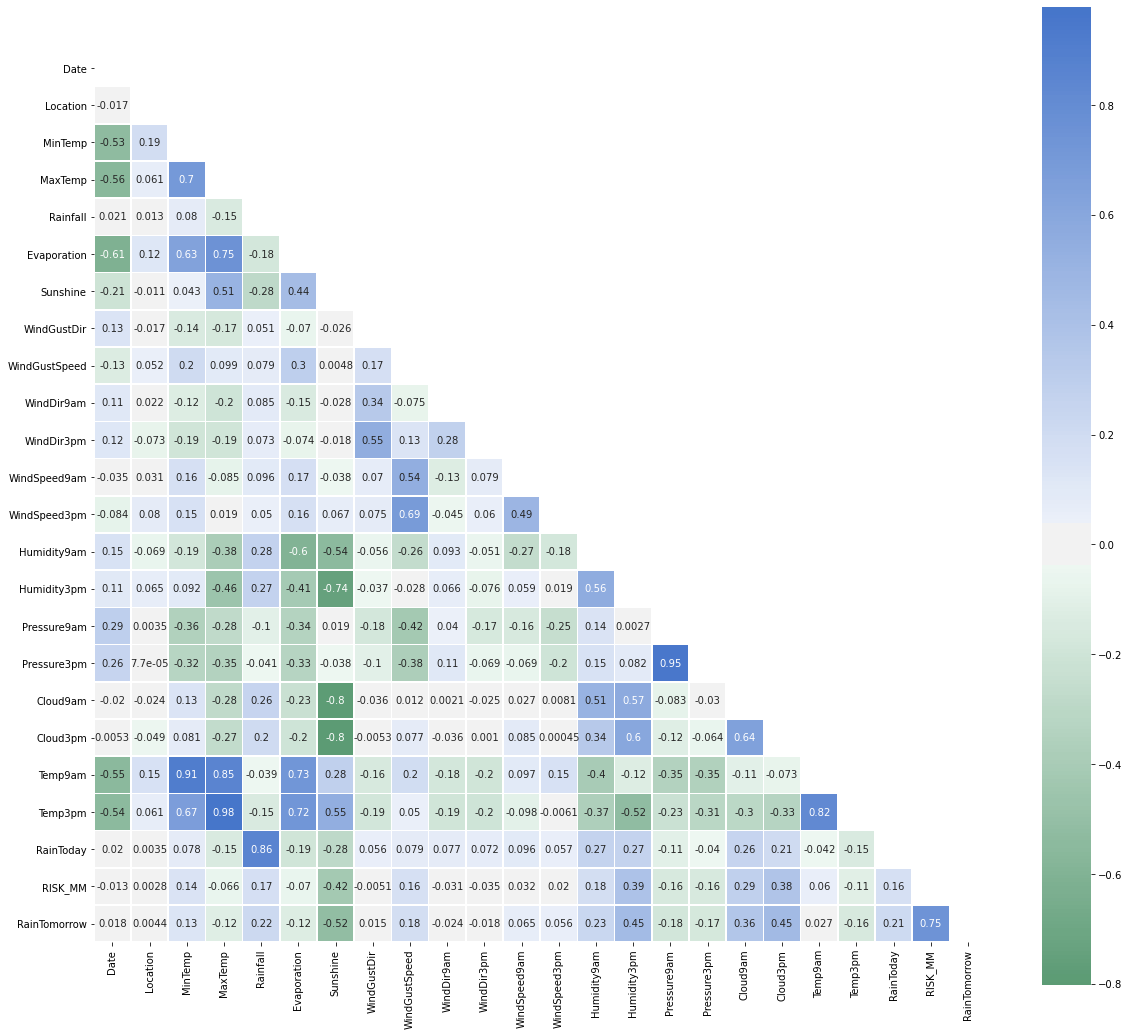

In [87]:
# Now the training dataset is free from outliers. Next step is to check if any feature is correlated highly with any other feature

# Correlation Heatmap
correlation = MiceImputedValue.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(140, 255, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

## Findings

### Some of the pairs that have correlation are: Pressure9am and  Presssure3pm, Temp9am and Temp3pm, etc.

### Since none of the variables have same correlation, we are not discarding any features as every feature might add value to the training.

## Feature Selection

In [88]:
# Feature Selection by Fileter Method(Chi-Square Value):
# Standardize the data using MinMaxScaler instead of StandardScaler to avoid negative values

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputedValue)
modified_data_entries = pd.DataFrame(r_scaler.transform(MiceImputedValue), index=MiceImputedValue.index, columns=MiceImputedValue.columns)
modified_data_entries.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.257958,0.0,0.607784,0.531250,0.436173,0.595825,0.484960,0.866667,0.521127,0.866667,...,0.217038,0.182109,0.240955,0.880865,0.516030,0.518732,0.546269,0.210354,0.000000,0.0
1,0.290157,0.0,0.428144,0.593750,0.373526,0.621676,0.731101,0.933333,0.521127,0.400000,...,0.247152,0.274760,0.263149,0.346014,0.306094,0.527378,0.620896,0.210354,0.000000,0.0
2,0.322356,0.0,0.592814,0.610795,0.373526,0.710007,0.791328,1.000000,0.549296,0.866667,...,0.297342,0.178914,0.291683,0.308351,0.206756,0.636888,0.588060,0.210354,0.000000,0.0
3,0.331138,0.0,0.482036,0.676136,0.373526,0.641297,0.795405,0.266667,0.239437,0.600000,...,0.156810,0.498403,0.421672,0.296545,0.246651,0.553314,0.686567,0.210354,0.074627,0.0
4,0.334065,0.0,0.730539,0.798295,0.477938,0.670525,0.399999,0.866667,0.478873,0.066667,...,0.327455,0.281150,0.206080,0.794360,0.827023,0.544669,0.782090,0.210354,0.014925,0.0


In [89]:
# Feature Importance using Filter Method (Chi-Square)

X = modified_data_entries.loc[:,modified_data_entries.columns!='RainTomorrow']
y = modified_data_entries[['RainTomorrow']]
selector = SelectKBest(chi2, k=11)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [90]:
# To double check the above, we will check if other variables has low feature importance compared to RISK_MM with respect
# to the target variable

permutation = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(permutation, feature_names = X.columns.tolist())

Weight,Feature
0.4757 ± 0.0041,RISK_MM
0 ± 0.0000,MaxTemp
0 ± 0.0000,Rainfall
0 ± 0.0000,Evaporation
0 ± 0.0000,Sunshine
0 ± 0.0000,WindGustDir
0 ± 0.0000,WindGustSpeed
0 ± 0.0000,WindDir9am
0 ± 0.0000,WindDir3pm
0 ± 0.0000,Cloud3pm


In [95]:
# From the above, it is proved that RISK_MM has the highest feature importance with respect to the 
# target variable, so it is good to drop(not consider) that variable when constructing models

In [96]:
# Training with different models

features = MiceImputedValue[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
target = MiceImputedValue['RainTomorrow']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [97]:
def plot_roc_curve(fpos, tpos):  
    plt.plot(fpos, tpos, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
def run_stats_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fpos, tpos, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fpos, tpos)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.7793339789912836
ROC Area under Curve = 0.7577295726929294
Time taken = 0.15323185920715332
              precision    recall  f1-score   support

         0.0    0.79457   0.85853   0.82531      8150
         1.0    0.75027   0.65693   0.70051      5273

    accuracy                        0.77933     13423
   macro avg    0.77242   0.75773   0.76291     13423
weighted avg    0.77717   0.77933   0.77628     13423



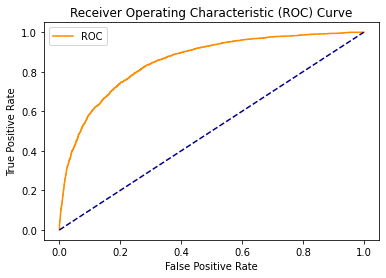

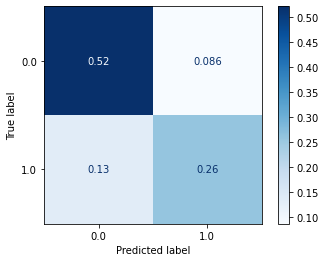

In [99]:
# Model 1 - Logistic Regression 

params_lr = {'penalty': 'l2','solver':'liblinear','multi_class':'ovr'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_stats_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.7537808239588766
ROC Area under Curve = 0.7089375205788488
Time taken = 0.05094408988952637
              precision    recall  f1-score   support

         0.0    0.73935   0.91816   0.81911      8150
         1.0    0.79800   0.49972   0.61458      5273

    accuracy                        0.75378     13423
   macro avg    0.76868   0.70894   0.71684     13423
weighted avg    0.76239   0.75378   0.73876     13423



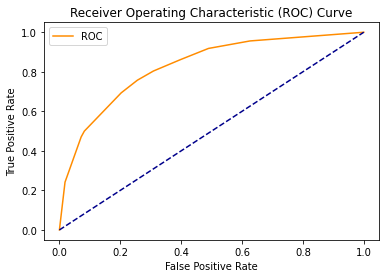

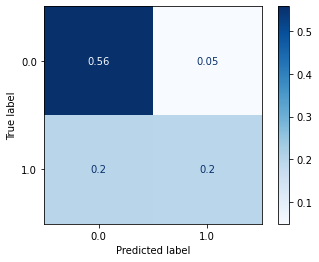

In [100]:
# Model 2 - Decision Tree

params_dt = {'max_depth': 32,
             'max_features': "log2",
             'max_leaf_nodes':10}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_stats_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.7455114355956195
ROC Area under Curve = 0.7358015308918334
Time taken = 0.026237964630126953
              precision    recall  f1-score   support

         0.0    0.79595   0.78110   0.78846      8150
         1.0    0.67115   0.69050   0.68069      5273

    accuracy                        0.74551     13423
   macro avg    0.73355   0.73580   0.73457     13423
weighted avg    0.74692   0.74551   0.74612     13423



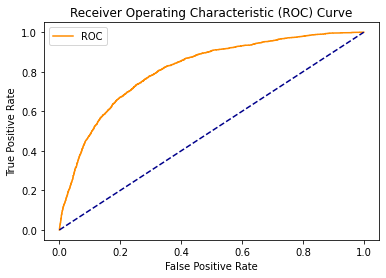

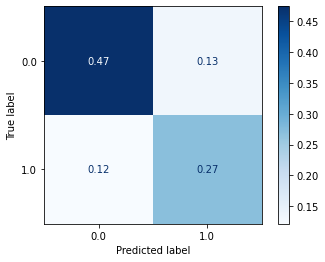

In [101]:
#Model 3 - Gaussian Naive Bayes

params_gnb = {'var_smoothing':1e-9}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = run_stats_model(model_gnb, X_train, y_train, X_test, y_test)

test accuracy: 0.74551
Accuracy = 0.7455114355956195
ROC Area under Curve = 0.7358015308918334
Time taken = 0.021401166915893555
              precision    recall  f1-score   support

         0.0    0.79595   0.78110   0.78846      8150
         1.0    0.67115   0.69050   0.68069      5273

    accuracy                        0.74551     13423
   macro avg    0.73355   0.73580   0.73457     13423
weighted avg    0.74692   0.74551   0.74612     13423



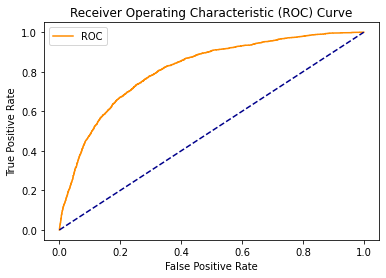

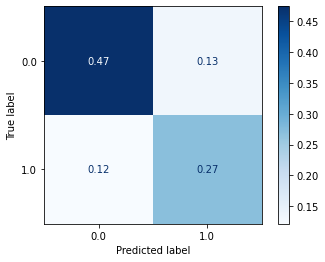

In [102]:
#Model 3 - Gaussian Naive Bayes without parameters

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
prediction_y = gaussian.predict(X_test)
prediction_y =gaussian.predict(X_test)
X=accuracy_score(y_test, prediction_y)
print('test accuracy: %.5f' % X)
gaussian, accuracy_gaussian, roc_auc_gaussian, tt_gaussian = run_stats_model(gaussian, X_train, y_train, X_test, y_test)

Accuracy = 0.848916039633465
ROC Area under Curve = 0.8418755228336507
Time taken = 35.232889890670776
              precision    recall  f1-score   support

         0.0    0.87623   0.87472   0.87548      8150
         1.0    0.80688   0.80903   0.80795      5273

    accuracy                        0.84892     13423
   macro avg    0.84156   0.84188   0.84172     13423
weighted avg    0.84899   0.84892   0.84895     13423



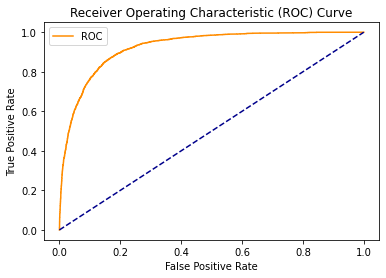

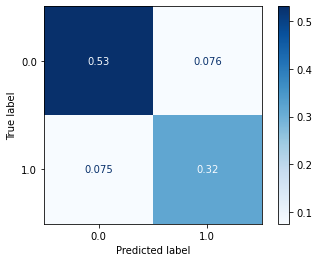

In [103]:
# Model 4 - Neural Network (Multilayer Perceptron)

params_nn = {'hidden_layer_sizes': (25,25,25),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 500,
             'batch_size' : 10}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_stats_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.7742680473813603
ROC Area under Curve = 0.7477334935817261
Time taken = 0.7234230041503906
              precision    recall  f1-score   support

         0.0    0.78175   0.87153   0.82421      8150
         1.0    0.75859   0.62393   0.68470      5273

    accuracy                        0.77427     13423
   macro avg    0.77017   0.74773   0.75445     13423
weighted avg    0.77265   0.77427   0.76940     13423



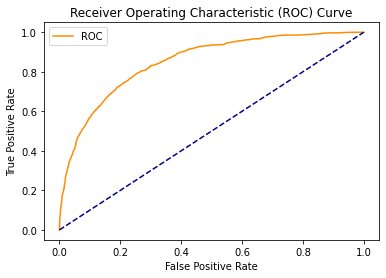

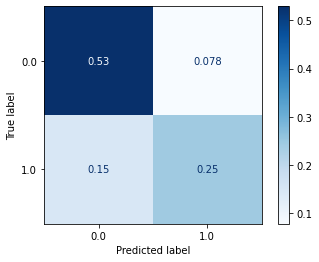

In [104]:
#Model 5 - AdaBoostClassifier

params_abc = {'n_estimators' : 20,
               'random_state' : 10
             }

model_abc = AdaBoostClassifier(**params_abc)
model_abc, accuracy_abc, roc_auc_abc, tt_abc = run_stats_model(model_abc, X_train, y_train, X_test, y_test)

In [105]:
# Applying 5 - fold cross validation for the decision tree model

# Applying 5-Fold Cross Validation

scores = cross_val_score(model_nn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84541843 0.8487708  0.85522722 0.8504905  0.8493729 ]


In [106]:
# Find the Average Cross - Validation Score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8499


In [107]:
# From the above, CV does not improve the accuracy of the model. 

# References
## https://www.kaggle.com/
## https://scikit-learn.org/stable/